In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import re

In [8]:

def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [66]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\qsort_actual_lab_omp.csv')

In [67]:
df.head()

,sys,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,1,qsort20000.dat,7049.80,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,qsort20000.dat,5936.48,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,3,qsort20000.dat,6163.20,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,4,qsort20000.dat,5656.76,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,5,qsort20000.dat,5899.16,2048


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
sys                      320 non-null object
arch                     320 non-null object
cpu-clock                320 non-null float64
isa                      320 non-null object
l1d_assoc                320 non-null int64
l1d_cache_lines          320 non-null int64
l1d_shared_by_threads    320 non-null int64
l1d_size                 320 non-null int64
l2_assoc                 320 non-null int64
l2_cache_lines           320 non-null int64
l2_shared_by_threads     320 non-null int64
l2_size                  320 non-null int64
l3_assoc                 320 non-null int64
l3_cache_lines           320 non-null int64
l3_shared_by_threads     320 non-null int64
l3_size                  320 non-null int64
mem-size                 320 non-null int64
mem-type                 320 non-null object
mem_clock                320 non-null int64
num-cpus                 320 non-null int64
PS       

In [69]:
df.columns, len(df.columns)

(Index(['sys', 'arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'bus_speed'],
       dtype='object'), 23)

In [70]:
len(df)

320

In [93]:
import re
st = "qsort20000.dat"
temp = re.findall(r'\d+', st) 
res = list(map(int, temp)) 

# print result 
t = str(res[0])
int(t)

20000

In [94]:
def encode_qsort_PS_col(data):
    for i in range(len(data)):
        st = data[i]
        temp = re.findall(r'\d+', st) 
        res = list(map(int, temp)) 
        x = str(res[0])
        data[i] = int(x)

In [95]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [96]:
encode_qsort_PS_col(encoded_data_frame['PS'])

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [97]:
encoded_data_frame.head()

,sys,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,1,20000,7049.80,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,20000,5936.48,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,3,20000,6163.20,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,4,20000,5656.76,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,5,20000,5899.16,2048


In [98]:
encoded_data_frame.columns

Index(['sys', 'arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [99]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])

In [100]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [101]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [102]:
X_columns = total_data.drop(columns = 'runtime').columns
X = total_data.drop(columns = ['runtime']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [103]:
X_columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'bus_speed'],
      dtype='object')

In [104]:
X.shape, Y.shape

((320, 22), (320,))

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [106]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((256, 22), (64, 22), (256,), (64,))

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

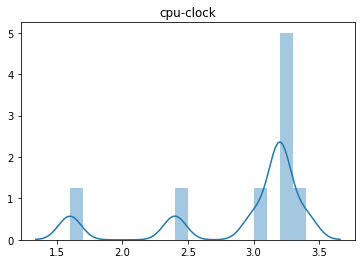

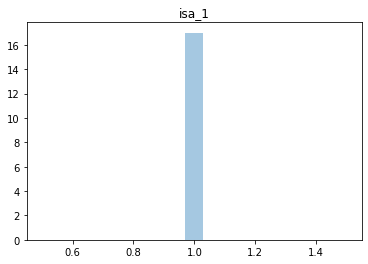

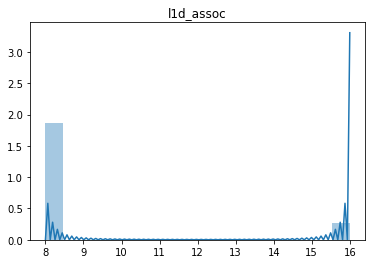

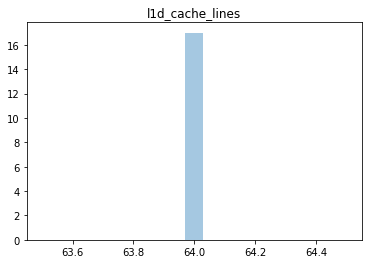

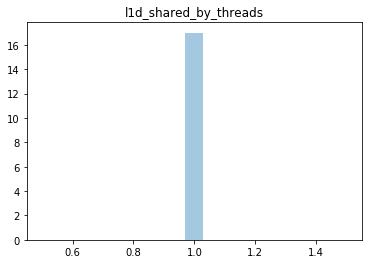

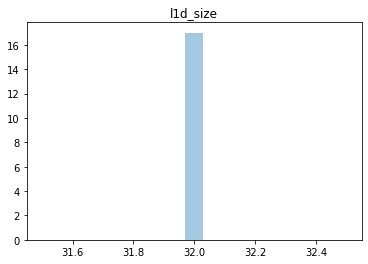

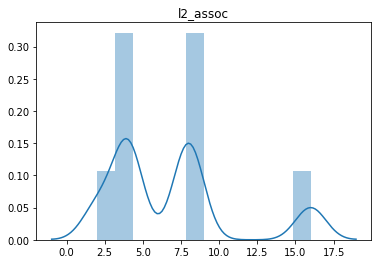

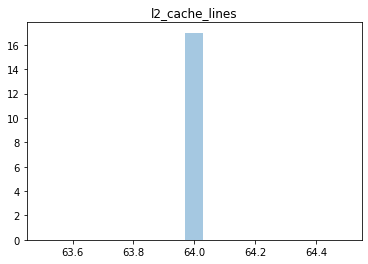

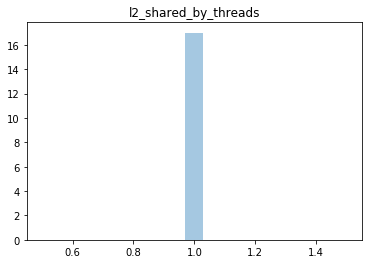

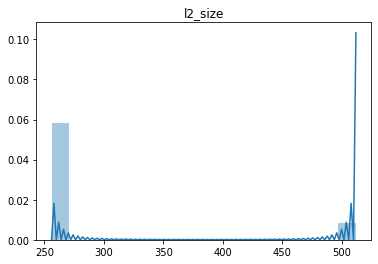

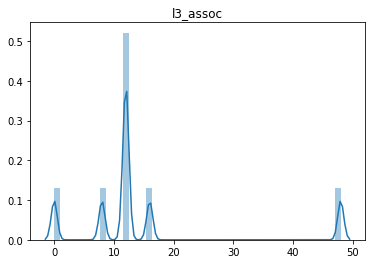

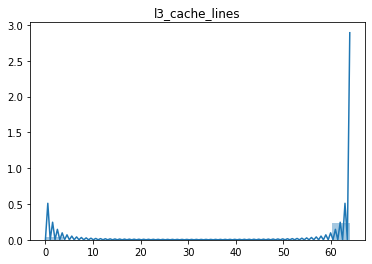

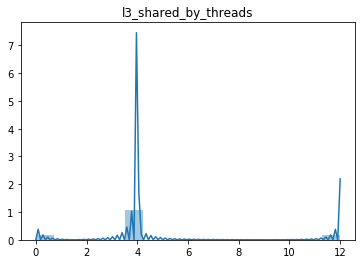

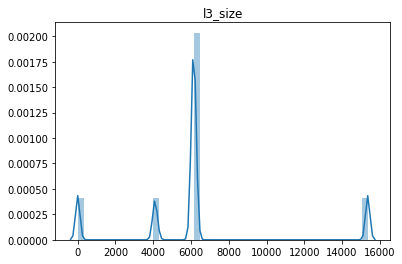

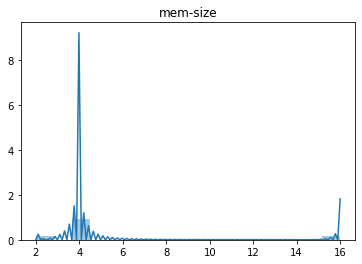

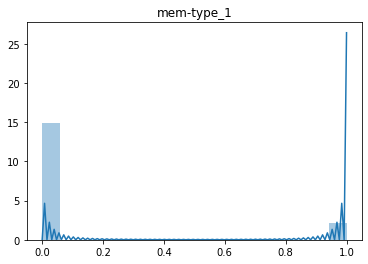

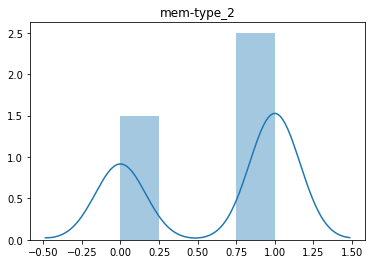

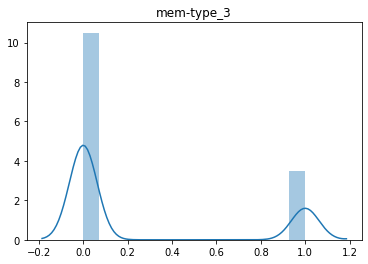

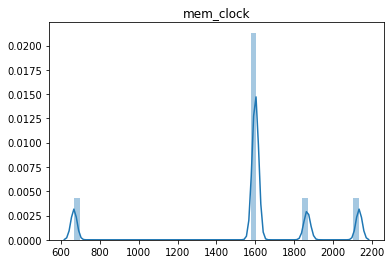

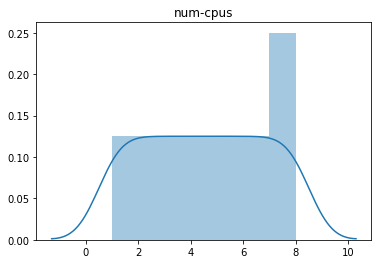

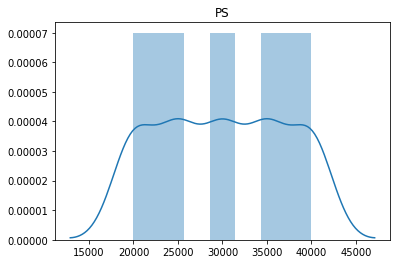

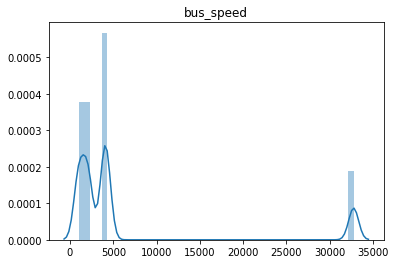

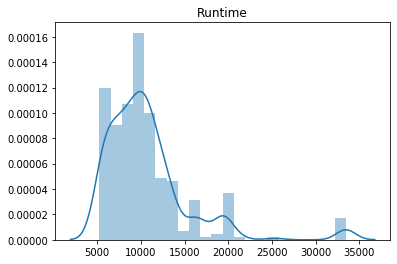

In [108]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [109]:
temp.head(100)

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,1,20000,7049.80,2048
1,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,20000,5936.48,2048
2,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,3,20000,6163.20,2048
3,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,4,20000,5656.76,2048
4,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,5,20000,5899.16,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.4,1,8,64,1,32,8,64,1,256,...,15360,16,0,0,1,1866,8,25000,11359.56,32768
96,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,0,1,2133,1,25000,9219.52,4096
97,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,0,1,2133,2,25000,8304.60,4096
98,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,0,1,2133,3,25000,6921.60,4096


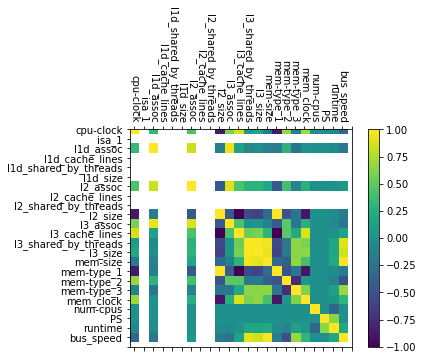

<Figure size 1440x1080 with 0 Axes>

In [110]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [111]:
correlations

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
cpu-clock,1.000000e+00,NaN,0.334077,NaN,NaN,NaN,0.440275,NaN,NaN,-0.868599,...,0.176227,-0.182553,-0.868599,0.684653,-0.102062,0.700652,0.000000,-2.309264e-18,-0.072270,-0.324443
isa_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_assoc,3.340766e-01,NaN,1.000000,NaN,NaN,NaN,0.849509,NaN,NaN,-0.142857,...,-0.012155,-0.114799,-0.142857,0.292770,-0.218218,0.016191,0.000000,0.000000e+00,-0.030904,-0.202326
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_assoc,4.402752e-01,NaN,0.849509,NaN,NaN,NaN,1.000000,NaN,NaN,-0.436234,...,0.291064,0.180812,-0.436234,0.392112,-0.105215,0.256223,0.000000,0.000000e+00,0.024834,0.069680
l2_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_size,-8.685990e-01,NaN,-0.142857,NaN,NaN,NaN,-0.436234,NaN,NaN,1.000000,...,-0.595571,-0.298476,1.000000,-0.487950,-0.218218,-0.885688,0.000000,0.000000e+00,-0.030904,-0.163787


In [112]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.040, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.042, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.007, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.040, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.042, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.040, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.042, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.007, total=   0.0s
[CV] C

[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.221, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.393, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.458, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.302, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  6651857.647141385
R2 score = 0.6209642457897393
Mean Absolute Percentage Error is: 0.12244521304129517
Mean Absolute Error is: 1523.1182438970827


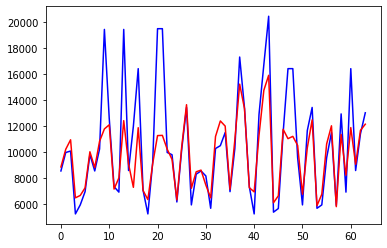

In [113]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
MSE for 10 folds
 [10946499.636277832, 6991031.868781223, 57694424.56498884, 3147941.3931415435, 49522818.56722382, 1922588.594502921, 8909832.987244252, 8220263.64286183, 19125182.381009806, 5836412.93231929]

R2 scores for 10 folds
 [0.4005044714356051, 0.5789658809897928, 0.11022045011039916, 0.6090801382031585, 0.05330963755228357, 0.6932894388539439, 0.4316257920459523, 0.548223475324884, 0.29523648652288303, 0.45390800122652775]

MAPE for 10 folds
 [0.17322469839908095, 0.15944231337237594, 0.20057690068579945, 0.15564274932218564, 0.1452570040432152, 0.07933368162305092, 0.1321472611198823, 0.13135432136121178, 0.11

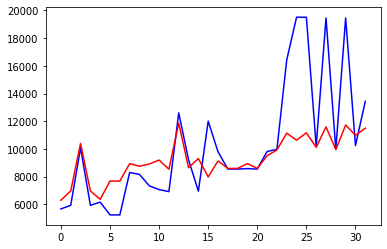

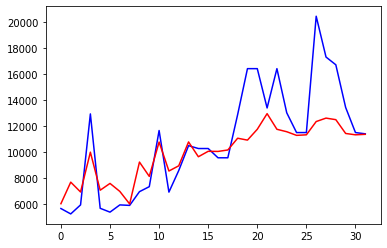

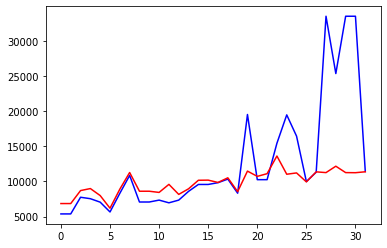

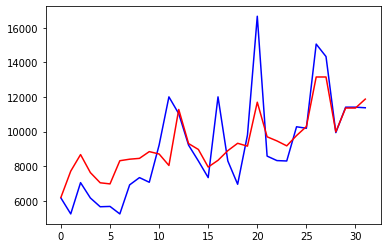

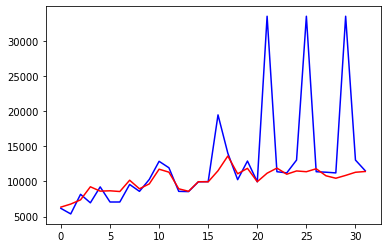

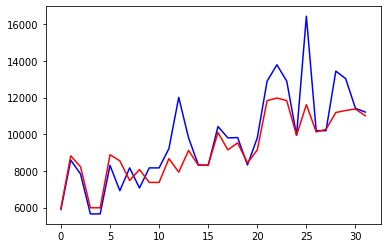

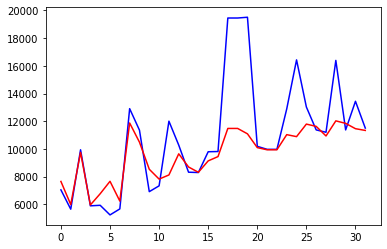

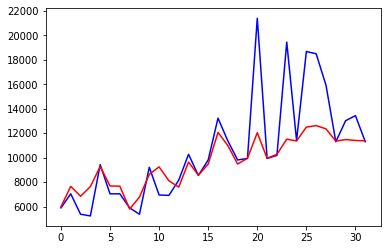

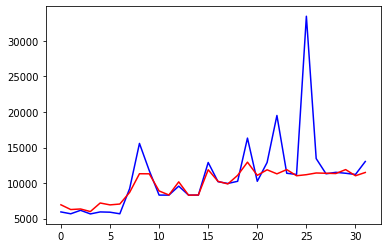

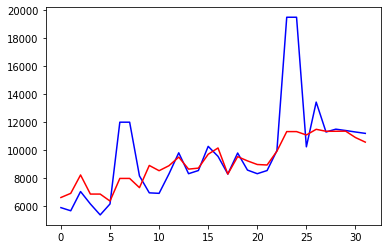

In [114]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.990, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-1.598, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.466, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-1.024, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-1.681, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-0.436, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.990, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-1.598, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.466, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01, 'normalize_y': True}
GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  4838621.514780577
R2 score = 0.7242859585275385

Mean Absolute Percentage Error = 0.1547072013050196
Mean Absolute Error is: 1482.3171797689024


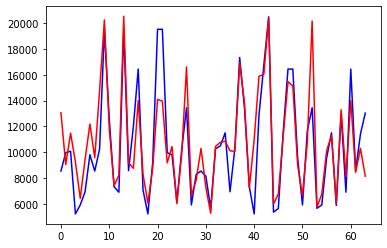

In [115]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
MSE for 10 folds
 [14287377.36522753, 8079484.5327230785, 50625620.26719471, 3536538.3579840395, 47982510.7999626, 5579048.911962378, 11969793.389192909, 10082791.68416589, 23611936.593810715, 7000592.1222749045]

R2 scores for 10 folds
 [0.21753810533368767, 0.513413940010447, 0.21923752678241004, 0.5608231178781076, 0.08275453912811281, 0.10997431934121749, 0.23642543617864897, 0.44586101078994433, 0.12989946645547668, 0.3449799750320707]

MAPE for 10 folds
 [0.2246616710375674, 0.18551826006991373, 0.19819949103864745, 0.17219446365909932, 0.1853374515737008, 0.13542130442478473, 0.1881105072370632, 0.15896220788086673,

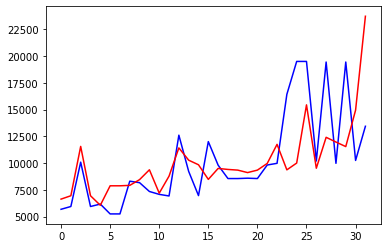

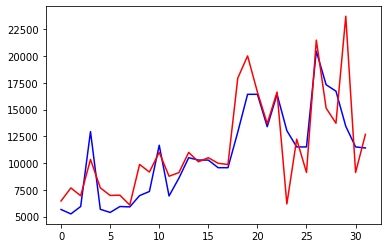

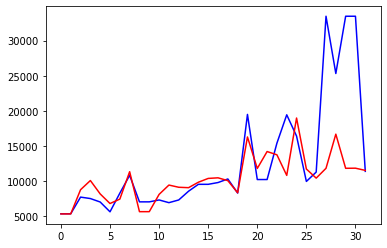

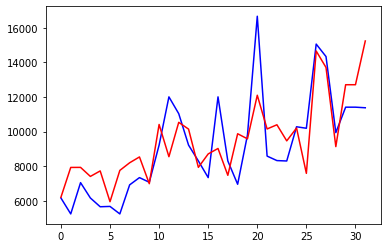

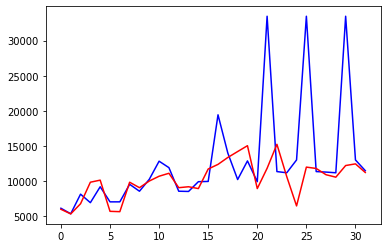

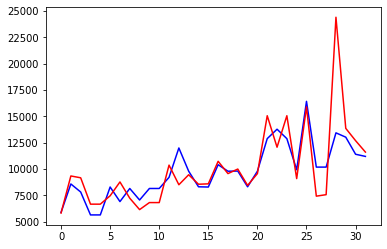

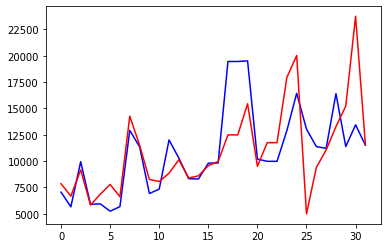

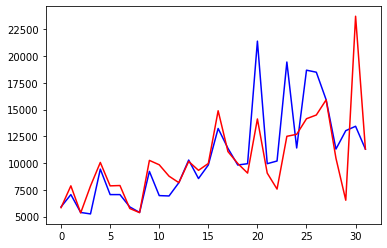

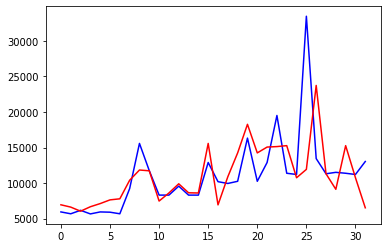

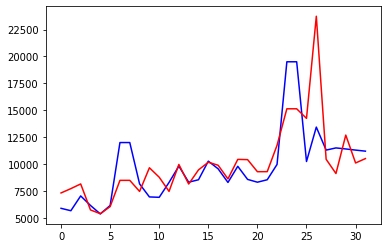

In [116]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best =GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.842, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.768, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.732, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.936, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.877, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.860, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.964, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.932, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.914, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.976, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.968, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.921, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.976, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.864, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.553, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.896, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.870, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.206, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.427, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.945, total=   1.3s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.214, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.440, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.631, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.259, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.510, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.819, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.965, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.932, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.936, total=   0.3s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.977, total=   0.6s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.938, total=   0.5s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.438, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.317, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.809, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.624, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.696, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.811, total=   0.1s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.347, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.927, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.863, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.774, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.961, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.938, total=   0.5s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.966, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.972, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.924, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.970, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.937, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.968, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.921, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.976, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.968, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.921, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.883, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.909, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.932, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.790, total=   0.6s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.913, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.945, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.203, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.880, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.944, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.493, total=   0.7s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.876, total=   1.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.945, total=   1.0s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.543, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.938, total=   0.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.960, total=   0.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.976, total=   1.0s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.839, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.960, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.804, total=   0.1s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.809, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.624, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.696, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.811, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.704, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.811, total=   0.2s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.613, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.347, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.927, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.862, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.774, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.961, total=   0.4s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.851, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.908, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.827, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.962, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.942, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.873, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.925, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.928, total=   0.4s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.978, total=   0.8s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.925, total=   0.8s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.927, total=   0.7s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.884, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.640, total=   0.8s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.767, total=   0.8s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.369, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.634, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.561, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.573, total=   0.2s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.684, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.617, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.542, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.822, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.724, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.950, total=   0.3s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.832, total=   0.9s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.852, total=   0.5s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.963, total=   0.4s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.959, total=   1.0s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.769, total=   1.1s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.981, total=   1.1s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=-0.067, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.577, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=-0.134, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.298, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.629, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=-0.020, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  crite

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.621, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.660, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.712, total=   1.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.640, total=   1.1s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.683, total=   1.3s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=0.406, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  5.2min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'loss': 'huber', 'max_depth': 5, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='huber', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  244867.05529468527
R2 score = 0.9860470001151103

Mean Absolute Percentage Error = 0.016828558228823072
Mean Absolute Error is: 189.21361557630067


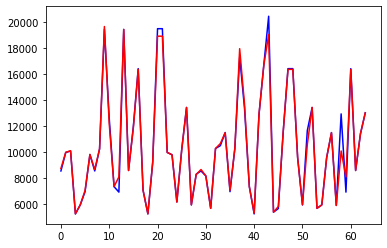

In [117]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
(288, 22) (32, 22) (288,) (32,)
MSE for 10 folds
 [398903.52130949806, 718947.6485315949, 2584711.7027711635, 762076.3566227991, 391456.3232419811, 51995.13465604474, 220487.4671452291, 2666170.305782344, 164038.8039769008, 77534.24717630193]

R2 scores for 10 folds
 [0.978153666898129, 0.9567014575965977, 0.9601378533051228, 0.9053633003909518, 0.9925168247839256, 0.9917052160962478, 0.985934709474142, 0.8534702526257424, 0.9939551654183367, 0.9927454015840038]

MAPE for 10 folds
 [0.019672546201361753, 0.027150199533091657, 0.022534366128688955, 0.017335240512112417, 0.016146422986852853, 0.015269995213952893, 0.017271908771672933, 0.032491529720814254

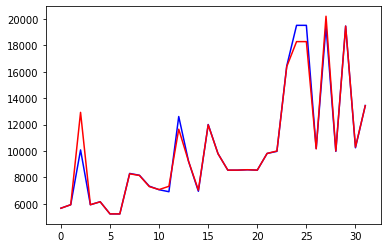

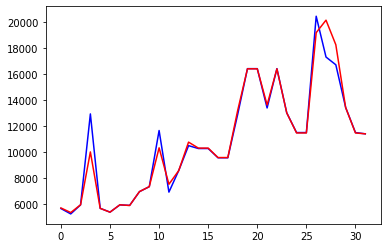

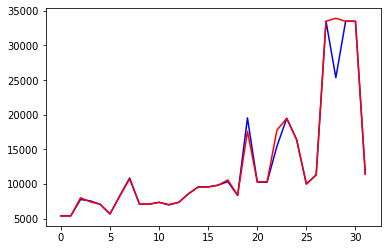

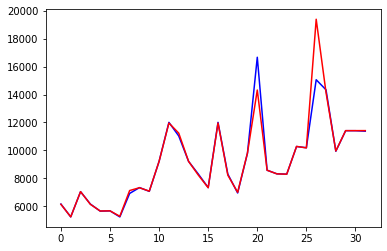

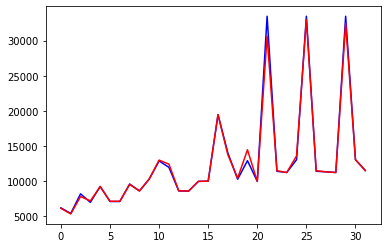

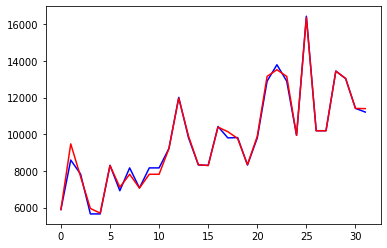

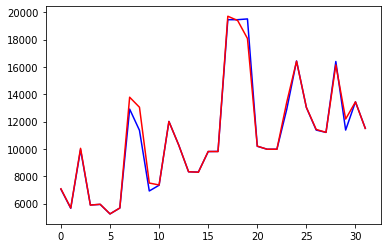

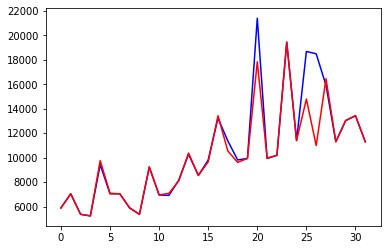

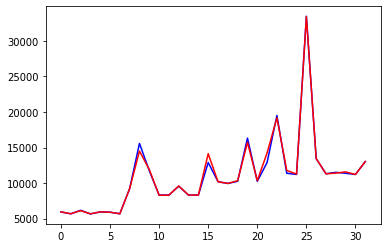

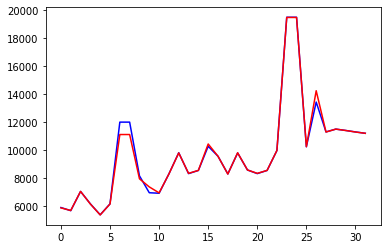

In [118]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='huber', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-0.211, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-0.367, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-0.258, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.249, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.487, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimator

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.243, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.480, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.475, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[20:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[20:10:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.475, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:10:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.607, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:10:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.771, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[20:10:13] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.732, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[20:10:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.801, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[20:10:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.806, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[20:10:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[20:10:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:10:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.872, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:10:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.883, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[20:10:15] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[20:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.885, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[20:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[20:10:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.615, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[20:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.403, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-2.426, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:10:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-5.174, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[20:10:17] WARNING: C:/Jenkins/workspace/x

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-2.426, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[20:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-5.174, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[20:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-4.545, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[20:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[20:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-4.545, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-1.998, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:10:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-4.179, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[20:10:19] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-2.836, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[20:10:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-6.124, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[20:10:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-5.410, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[20:10:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[20:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-5.410, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-2.677, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:10:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-5.755, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[20:10:21] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-2.677, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[20:10:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-5.755, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[20:10:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-5.072, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[20:10:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[20:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-5.588, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-2.892, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-6.254, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[20:10:23] WARNING: C:/Jenkins/work

[20:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-2.892, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[20:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-6.254, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[20:10:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-5.529, total=   0.0s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[20:10:24] WARNING: C:/Jenkins/wor

[20:10:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-6.254, total=   0.1s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[20:10:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-5.529, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   12.7s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[20:10:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  818710.4811256798
R2 score = 0.9533482883797616

Mean Absolute Percentage Error = 0.05431838718681565
Mean Absolute Error is: 620.2935652160645


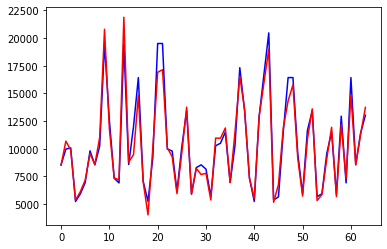

In [119]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(288, 22) (32, 22) (288,) (32,)
[20:10:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(288, 22) (32, 22) (288,) (32,)
[20:10:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(288, 22) (32, 22) (288,) (32,)
[20:10:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(288, 22) (32, 22) (288,) (32,)
[20:10:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(288, 22) (32, 22) (288,) (32,)
[20:10:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

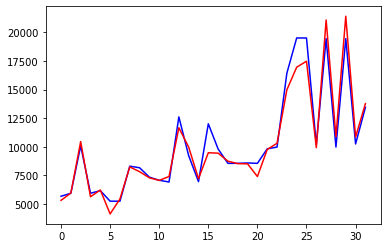

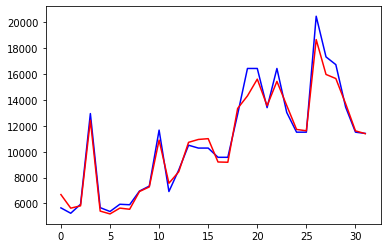

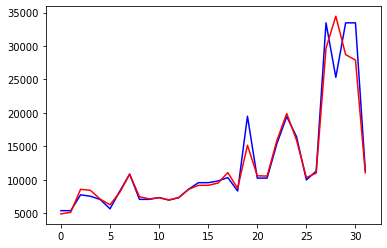

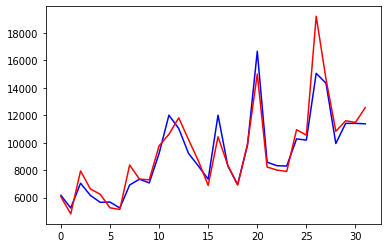

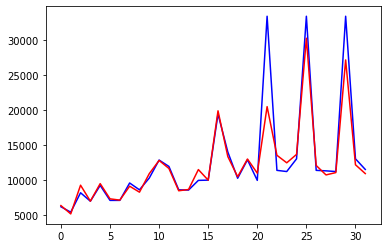

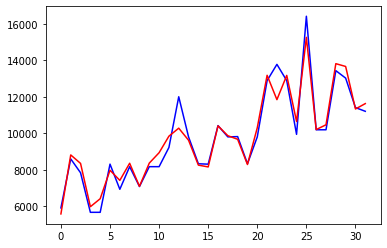

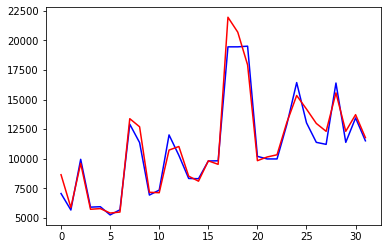

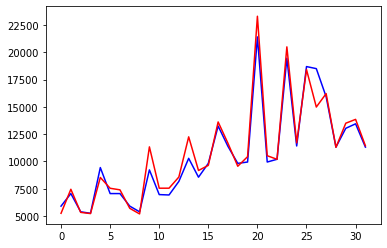

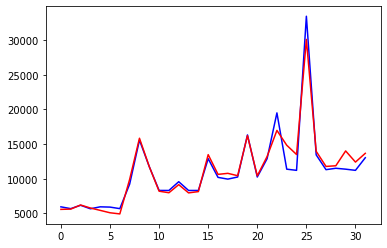

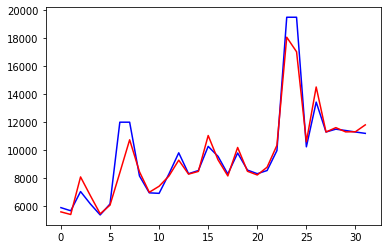

In [120]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(288, 22) (32, 22) (288,) (32,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 3363.0197 - mae: 3363.0198
Epoch 2/100
 - 0s - loss: 1931.2078 - mae: 1931.2079
Epoch 3/100
 - 0s - loss: 1832.6483 - mae: 1832.6484
Epoch 4/100
 - 0s - loss: 1813.3647 - mae: 1813.3646
Epoch 5/100
 - 0s - loss: 1869.443

Epoch 27/100
 - 0s - loss: 1866.7585 - mae: 1866.7584
Epoch 28/100
 - 0s - loss: 1851.3890 - mae: 1851.3892
Epoch 29/100
 - 0s - loss: 1840.1865 - mae: 1840.1864
Epoch 30/100
 - 0s - loss: 1889.0574 - mae: 1889.0573
Epoch 31/100
 - 0s - loss: 1839.3940 - mae: 1839.3940
Epoch 32/100
 - 0s - loss: 1832.7218 - mae: 1832.7218
Epoch 33/100
 - 0s - loss: 1826.1067 - mae: 1826.1066
Epoch 34/100
 - 0s - loss: 1825.9773 - mae: 1825.9772
Epoch 35/100
 - 0s - loss: 1840.9383 - mae: 1840.9384
Epoch 36/100
 - 0s - loss: 1854.2177 - mae: 1854.2179
Epoch 37/100
 - 0s - loss: 1854.3710 - mae: 1854.3711
Epoch 38/100
 - 0s - loss: 1854.1757 - mae: 1854.1755
Epoch 39/100
 - 0s - loss: 1893.4685 - mae: 1893.4683
Epoch 40/100
 - 0s - loss: 1867.7130 - mae: 1867.7131
Epoch 41/100
 - 0s - loss: 1843.0752 - mae: 1843.0753
Epoch 42/100
 - 0s - loss: 1845.5063 - mae: 1845.5065
Epoch 43/100
 - 0s - loss: 1817.0241 - mae: 1817.0239
Epoch 44/100
 - 0s - loss: 1889.7766 - mae: 1889.7765
Epoch 45/100
 - 0s - loss: 1

Epoch 77/100
 - 0s - loss: 1560.9578 - mae: 1560.9580
Epoch 78/100
 - 0s - loss: 1569.7066 - mae: 1569.7065
Epoch 79/100
 - 0s - loss: 1571.9081 - mae: 1571.9081
Epoch 80/100
 - 0s - loss: 1581.2488 - mae: 1581.2490
Epoch 81/100
 - 0s - loss: 1553.8943 - mae: 1553.8942
Epoch 82/100
 - 0s - loss: 1575.8764 - mae: 1575.8767
Epoch 83/100
 - 0s - loss: 1562.6808 - mae: 1562.6804
Epoch 84/100
 - 0s - loss: 1548.2975 - mae: 1548.2974
Epoch 85/100
 - 0s - loss: 1585.2802 - mae: 1585.2803
Epoch 86/100
 - 0s - loss: 1595.8755 - mae: 1595.8755
Epoch 87/100
 - 0s - loss: 1568.8024 - mae: 1568.8022
Epoch 88/100
 - 0s - loss: 1552.9365 - mae: 1552.9366
Epoch 89/100
 - 0s - loss: 1581.5032 - mae: 1581.5034
Epoch 90/100
 - 0s - loss: 1551.8490 - mae: 1551.8491
Epoch 91/100
 - 0s - loss: 1577.7200 - mae: 1577.7198
Epoch 92/100
 - 0s - loss: 1584.3024 - mae: 1584.3022
Epoch 93/100
 - 0s - loss: 1554.8582 - mae: 1554.8582
Epoch 94/100
 - 0s - loss: 1632.5708 - mae: 1632.5709
Epoch 95/100
 - 0s - loss: 1

Epoch 26/100
 - 0s - loss: 1574.7158 - mae: 1574.7156
Epoch 27/100
 - 0s - loss: 1578.2078 - mae: 1578.2076
Epoch 28/100
 - 0s - loss: 1618.6680 - mae: 1618.6680
Epoch 29/100
 - 0s - loss: 1647.0424 - mae: 1647.0422
Epoch 30/100
 - 0s - loss: 1561.5564 - mae: 1561.5565
Epoch 31/100
 - 0s - loss: 1579.6457 - mae: 1579.6458
Epoch 32/100
 - 0s - loss: 1599.6694 - mae: 1599.6694
Epoch 33/100
 - 0s - loss: 1582.4329 - mae: 1582.4329
Epoch 34/100
 - 0s - loss: 1569.0520 - mae: 1569.0521
Epoch 35/100
 - 0s - loss: 1592.1796 - mae: 1592.1796
Epoch 36/100
 - 0s - loss: 1603.6327 - mae: 1603.6327
Epoch 37/100
 - 0s - loss: 1570.3104 - mae: 1570.3103
Epoch 38/100
 - 0s - loss: 1600.9924 - mae: 1600.9922
Epoch 39/100
 - 0s - loss: 1564.7187 - mae: 1564.7188
Epoch 40/100
 - 0s - loss: 1585.2582 - mae: 1585.2582
Epoch 41/100
 - 0s - loss: 1574.6658 - mae: 1574.6658
Epoch 42/100
 - 0s - loss: 1575.8989 - mae: 1575.8989
Epoch 43/100
 - 0s - loss: 1586.6117 - mae: 1586.6119
Epoch 44/100
 - 0s - loss: 1

Epoch 76/100
 - 0s - loss: 1680.8328 - mae: 1680.8326
Epoch 77/100
 - 0s - loss: 1715.1235 - mae: 1715.1237
Epoch 78/100
 - 0s - loss: 1678.2537 - mae: 1678.2535
Epoch 79/100
 - 0s - loss: 1658.1774 - mae: 1658.1774
Epoch 80/100
 - 0s - loss: 1686.8708 - mae: 1686.8706
Epoch 81/100
 - 0s - loss: 1685.5344 - mae: 1685.5344
Epoch 82/100
 - 0s - loss: 1648.6928 - mae: 1648.6929
Epoch 83/100
 - 0s - loss: 1648.2606 - mae: 1648.2607
Epoch 84/100
 - 0s - loss: 1677.1101 - mae: 1677.1104
Epoch 85/100
 - 0s - loss: 1654.9162 - mae: 1654.9163
Epoch 86/100
 - 0s - loss: 1659.4835 - mae: 1659.4838
Epoch 87/100
 - 0s - loss: 1663.3613 - mae: 1663.3612
Epoch 88/100
 - 0s - loss: 1645.5462 - mae: 1645.5463
Epoch 89/100
 - 0s - loss: 1653.5615 - mae: 1653.5616
Epoch 90/100
 - 0s - loss: 1635.8503 - mae: 1635.8503
Epoch 91/100
 - 0s - loss: 1662.7649 - mae: 1662.7648
Epoch 92/100
 - 0s - loss: 1682.5213 - mae: 1682.5212
Epoch 93/100
 - 0s - loss: 1698.4200 - mae: 1698.4202
Epoch 94/100
 - 0s - loss: 1

Epoch 25/100
 - 0s - loss: 1624.1057 - mae: 1624.1056
Epoch 26/100
 - 0s - loss: 1590.2149 - mae: 1590.2150
Epoch 27/100
 - 0s - loss: 1621.2473 - mae: 1621.2473
Epoch 28/100
 - 0s - loss: 1595.7642 - mae: 1595.7643
Epoch 29/100
 - 0s - loss: 1574.1445 - mae: 1574.1445
Epoch 30/100
 - 0s - loss: 1659.1326 - mae: 1659.1326
Epoch 31/100
 - 0s - loss: 1701.4404 - mae: 1701.4406
Epoch 32/100
 - 0s - loss: 1594.3753 - mae: 1594.3755
Epoch 33/100
 - 0s - loss: 1665.2532 - mae: 1665.2531
Epoch 34/100
 - 0s - loss: 1598.6455 - mae: 1598.6455
Epoch 35/100
 - 0s - loss: 1604.9634 - mae: 1604.9634
Epoch 36/100
 - 0s - loss: 1627.7488 - mae: 1627.7488
Epoch 37/100
 - 0s - loss: 1633.4835 - mae: 1633.4836
Epoch 38/100
 - 0s - loss: 1625.1877 - mae: 1625.1877
Epoch 39/100
 - 0s - loss: 1627.7838 - mae: 1627.7838
Epoch 40/100
 - 0s - loss: 1626.3419 - mae: 1626.3418
Epoch 41/100
 - 0s - loss: 1615.9253 - mae: 1615.9253
Epoch 42/100
 - 0s - loss: 1588.1069 - mae: 1588.1066
Epoch 43/100
 - 0s - loss: 1

Epoch 75/100
 - 0s - loss: 1500.5164 - mae: 1500.5164
Epoch 76/100
 - 0s - loss: 1625.2086 - mae: 1625.2087
Epoch 77/100
 - 0s - loss: 1544.6537 - mae: 1544.6538
Epoch 78/100
 - 0s - loss: 1514.6241 - mae: 1514.6241
Epoch 79/100
 - 0s - loss: 1528.8621 - mae: 1528.8619
Epoch 80/100
 - 0s - loss: 1477.5141 - mae: 1477.5140
Epoch 81/100
 - 0s - loss: 1576.4790 - mae: 1576.4790
Epoch 82/100
 - 0s - loss: 1524.0212 - mae: 1524.0212
Epoch 83/100
 - 0s - loss: 1527.4747 - mae: 1527.4747
Epoch 84/100
 - 0s - loss: 1547.9195 - mae: 1547.9194
Epoch 85/100
 - 0s - loss: 1546.6527 - mae: 1546.6526
Epoch 86/100
 - 0s - loss: 1474.5126 - mae: 1474.5126
Epoch 87/100
 - 0s - loss: 1521.6151 - mae: 1521.6152
Epoch 88/100
 - 0s - loss: 1549.4852 - mae: 1549.4851
Epoch 89/100
 - 0s - loss: 1509.2278 - mae: 1509.2278
Epoch 90/100
 - 0s - loss: 1526.8039 - mae: 1526.8038
Epoch 91/100
 - 0s - loss: 1530.1327 - mae: 1530.1326
Epoch 92/100
 - 0s - loss: 1517.1416 - mae: 1517.1417
Epoch 93/100
 - 0s - loss: 1

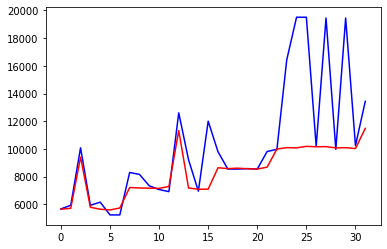

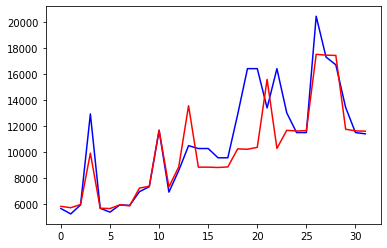

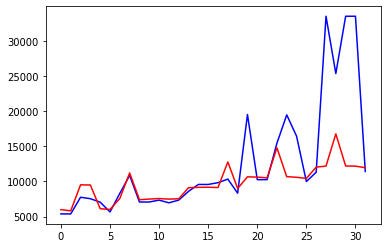

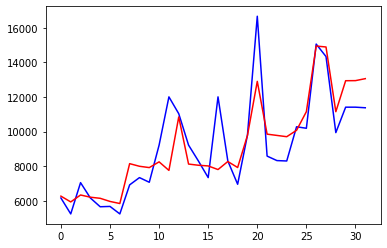

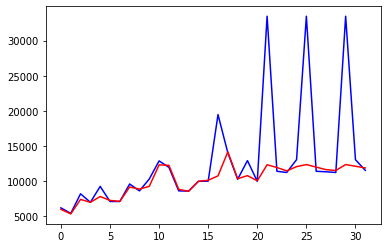

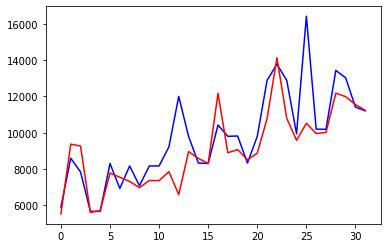

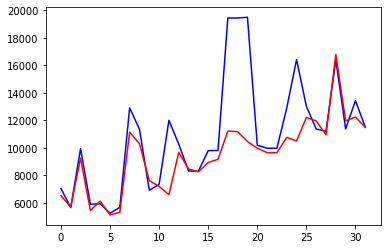

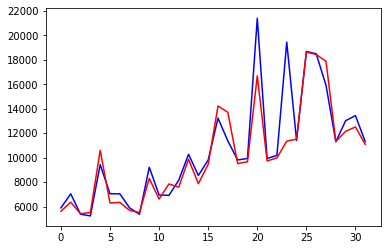

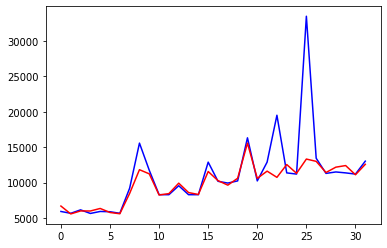

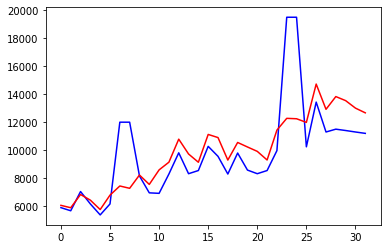

In [121]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 537,601
Trainable params: 537,601
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(288, 22) (32, 22) (288,) (32,)
Epoch 1/100
 - 1s - loss: 2366.1719 - mae: 2366.1724
Epoch 2/100
 - 1s - loss: 2108.1324 - mae: 2108

 - 1s - loss: 1834.1777 - mae: 1834.1777
Epoch 33/100
 - 0s - loss: 1893.7908 - mae: 1893.7910
Epoch 34/100
 - 0s - loss: 1969.5954 - mae: 1969.5955
Epoch 35/100
 - 1s - loss: 1842.3670 - mae: 1842.3669
Epoch 36/100
 - 1s - loss: 1931.4639 - mae: 1931.4642
Epoch 37/100
 - 0s - loss: 1871.0670 - mae: 1871.0670
Epoch 38/100
 - 1s - loss: 1879.0300 - mae: 1879.0299
Epoch 39/100
 - 1s - loss: 1886.6800 - mae: 1886.6799
Epoch 40/100
 - 1s - loss: 1866.2204 - mae: 1866.2205
Epoch 41/100
 - 1s - loss: 1901.8134 - mae: 1901.8134
Epoch 42/100
 - 0s - loss: 1883.6301 - mae: 1883.6302
Epoch 43/100
 - 0s - loss: 1844.7159 - mae: 1844.7159
Epoch 44/100
 - 0s - loss: 1906.4582 - mae: 1906.4584
Epoch 45/100
 - 0s - loss: 1923.1898 - mae: 1923.1897
Epoch 46/100
 - 0s - loss: 1850.9125 - mae: 1850.9126
Epoch 47/100
 - 0s - loss: 1850.9235 - mae: 1850.9233
Epoch 48/100
 - 1s - loss: 1927.6188 - mae: 1927.6185
Epoch 49/100
 - 0s - loss: 1918.2441 - mae: 1918.2444
Epoch 50/100
 - 0s - loss: 1864.1475 - ma

Epoch 83/100
 - 1s - loss: 1647.3494 - mae: 1647.3492
Epoch 84/100
 - 1s - loss: 1620.6912 - mae: 1620.6912
Epoch 85/100
 - 1s - loss: 1588.8052 - mae: 1588.8054
Epoch 86/100
 - 1s - loss: 1609.8346 - mae: 1609.8348
Epoch 87/100
 - 1s - loss: 1588.7270 - mae: 1588.7269
Epoch 88/100
 - 0s - loss: 1610.6684 - mae: 1610.6685
Epoch 89/100
 - 0s - loss: 1614.3355 - mae: 1614.3354
Epoch 90/100
 - 1s - loss: 1613.5718 - mae: 1613.5718
Epoch 91/100
 - 0s - loss: 1607.9363 - mae: 1607.9363
Epoch 92/100
 - 1s - loss: 1599.1170 - mae: 1599.1169
Epoch 93/100
 - 0s - loss: 1615.7651 - mae: 1615.7651
Epoch 94/100
 - 0s - loss: 1602.2229 - mae: 1602.2230
Epoch 95/100
 - 1s - loss: 1575.6251 - mae: 1575.6252
Epoch 96/100
 - 1s - loss: 1689.0768 - mae: 1689.0765
Epoch 97/100
 - 1s - loss: 1629.3068 - mae: 1629.3065
Epoch 98/100
 - 1s - loss: 1713.6870 - mae: 1713.6870
Epoch 99/100
 - 0s - loss: 1690.3968 - mae: 1690.3970
Epoch 100/100
 - 0s - loss: 1609.1960 - mae: 1609.1960
*******************Fold num

Epoch 32/100
 - 1s - loss: 1604.4482 - mae: 1604.4482
Epoch 33/100
 - 1s - loss: 1687.4257 - mae: 1687.4257
Epoch 34/100
 - 1s - loss: 1660.8958 - mae: 1660.8956
Epoch 35/100
 - 1s - loss: 1629.7250 - mae: 1629.7250
Epoch 36/100
 - 1s - loss: 1617.4191 - mae: 1617.4193
Epoch 37/100
 - 0s - loss: 1734.7784 - mae: 1734.7786
Epoch 38/100
 - 1s - loss: 1646.1048 - mae: 1646.1050
Epoch 39/100
 - 0s - loss: 1624.4656 - mae: 1624.4656
Epoch 40/100
 - 0s - loss: 1616.8953 - mae: 1616.8953
Epoch 41/100
 - 0s - loss: 1595.8810 - mae: 1595.8809
Epoch 42/100
 - 0s - loss: 1638.9905 - mae: 1638.9907
Epoch 43/100
 - 1s - loss: 1621.7629 - mae: 1621.7628
Epoch 44/100
 - 1s - loss: 1658.8931 - mae: 1658.8932
Epoch 45/100
 - 1s - loss: 1584.9944 - mae: 1584.9945
Epoch 46/100
 - 1s - loss: 1623.9195 - mae: 1623.9194
Epoch 47/100
 - 0s - loss: 1631.0486 - mae: 1631.0486
Epoch 48/100
 - 1s - loss: 1615.8192 - mae: 1615.8191
Epoch 49/100
 - 1s - loss: 1602.5730 - mae: 1602.5730
Epoch 50/100
 - 1s - loss: 1

Epoch 82/100
 - 0s - loss: 1710.4009 - mae: 1710.4009
Epoch 83/100
 - 1s - loss: 1637.0821 - mae: 1637.0823
Epoch 84/100
 - 1s - loss: 1723.1414 - mae: 1723.1414
Epoch 85/100
 - 1s - loss: 1690.0041 - mae: 1690.0040
Epoch 86/100
 - 1s - loss: 1738.5186 - mae: 1738.5183
Epoch 87/100
 - 1s - loss: 1654.2939 - mae: 1654.2938
Epoch 88/100
 - 1s - loss: 1676.5789 - mae: 1676.5787
Epoch 89/100
 - 1s - loss: 1644.6762 - mae: 1644.6760
Epoch 90/100
 - 0s - loss: 1718.8924 - mae: 1718.8923
Epoch 91/100
 - 0s - loss: 1741.6961 - mae: 1741.6962
Epoch 92/100
 - 1s - loss: 1670.9296 - mae: 1670.9294
Epoch 93/100
 - 0s - loss: 1685.9560 - mae: 1685.9562
Epoch 94/100
 - 0s - loss: 1639.8588 - mae: 1639.8586
Epoch 95/100
 - 1s - loss: 1677.9080 - mae: 1677.9077
Epoch 96/100
 - 1s - loss: 1618.4830 - mae: 1618.4832
Epoch 97/100
 - 0s - loss: 1672.3557 - mae: 1672.3556
Epoch 98/100
 - 0s - loss: 1624.1845 - mae: 1624.1847
Epoch 99/100
 - 1s - loss: 1645.8044 - mae: 1645.8044
Epoch 100/100
 - 0s - loss: 

Epoch 31/100
 - 1s - loss: 1671.4707 - mae: 1671.4706
Epoch 32/100
 - 0s - loss: 1643.5174 - mae: 1643.5172
Epoch 33/100
 - 0s - loss: 1712.2374 - mae: 1712.2373
Epoch 34/100
 - 1s - loss: 1608.5468 - mae: 1608.5469
Epoch 35/100
 - 0s - loss: 1666.1979 - mae: 1666.1978
Epoch 36/100
 - 0s - loss: 1614.1032 - mae: 1614.1030
Epoch 37/100
 - 0s - loss: 1579.5730 - mae: 1579.5730
Epoch 38/100
 - 1s - loss: 1574.2690 - mae: 1574.2690
Epoch 39/100
 - 0s - loss: 1605.7032 - mae: 1605.7034
Epoch 40/100
 - 0s - loss: 1609.2532 - mae: 1609.2533
Epoch 41/100
 - 1s - loss: 1638.4334 - mae: 1638.4335
Epoch 42/100
 - 0s - loss: 1583.3345 - mae: 1583.3344
Epoch 43/100
 - 0s - loss: 1574.7706 - mae: 1574.7705
Epoch 44/100
 - 0s - loss: 1593.1092 - mae: 1593.1093
Epoch 45/100
 - 0s - loss: 1693.0873 - mae: 1693.0874
Epoch 46/100
 - 0s - loss: 1684.3878 - mae: 1684.3878
Epoch 47/100
 - 1s - loss: 1624.5557 - mae: 1624.5557
Epoch 48/100
 - 1s - loss: 1611.0954 - mae: 1611.0952
Epoch 49/100
 - 1s - loss: 1

Epoch 81/100
 - 1s - loss: 1502.5352 - mae: 1502.5350
Epoch 82/100
 - 1s - loss: 1487.1458 - mae: 1487.1456
Epoch 83/100
 - 1s - loss: 1477.1549 - mae: 1477.1549
Epoch 84/100
 - 1s - loss: 1469.2778 - mae: 1469.2777
Epoch 85/100
 - 1s - loss: 1502.5205 - mae: 1502.5204
Epoch 86/100
 - 1s - loss: 1480.3602 - mae: 1480.3601
Epoch 87/100
 - 1s - loss: 1615.3402 - mae: 1615.3401
Epoch 88/100
 - 1s - loss: 1543.9648 - mae: 1543.9647
Epoch 89/100
 - 1s - loss: 1520.1075 - mae: 1520.1077
Epoch 90/100
 - 1s - loss: 1523.0066 - mae: 1523.0066
Epoch 91/100
 - 1s - loss: 1497.9512 - mae: 1497.9513
Epoch 92/100
 - 1s - loss: 1515.7133 - mae: 1515.7134
Epoch 93/100
 - 1s - loss: 1525.5950 - mae: 1525.5952
Epoch 94/100
 - 1s - loss: 1445.3651 - mae: 1445.3647
Epoch 95/100
 - 1s - loss: 1532.5263 - mae: 1532.5260
Epoch 96/100
 - 1s - loss: 1514.5951 - mae: 1514.5952
Epoch 97/100
 - 1s - loss: 1506.8353 - mae: 1506.8354
Epoch 98/100
 - 1s - loss: 1461.5646 - mae: 1461.5646
Epoch 99/100
 - 1s - loss: 1

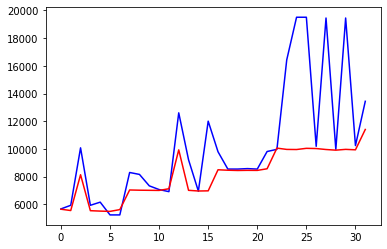

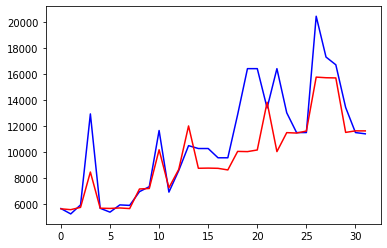

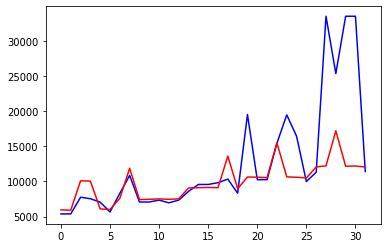

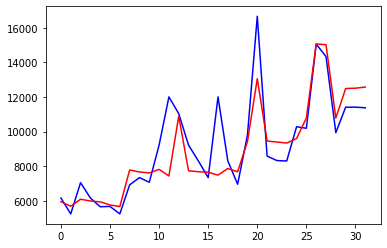

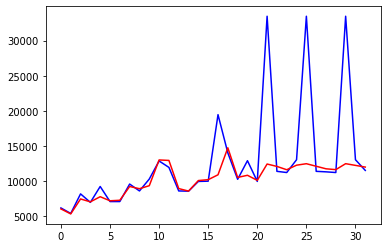

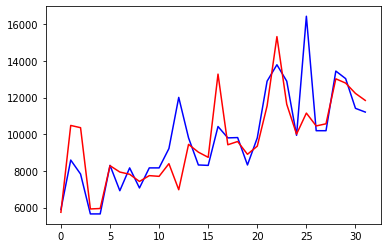

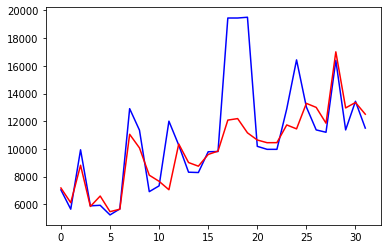

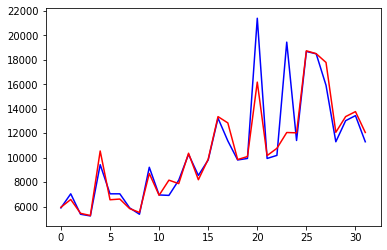

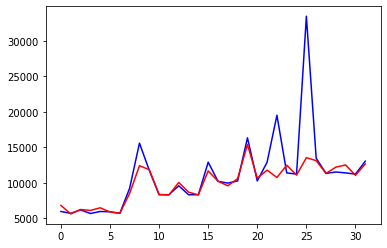

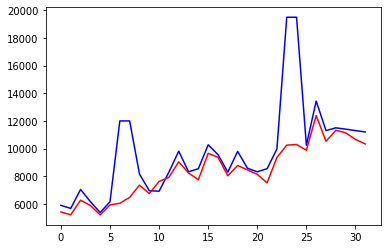

In [122]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5888      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 23,449
Trainable params: 23,449
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(2

Epoch 30/100
 - 0s - loss: 1850.1120 - mae: 1850.1124
Epoch 31/100
 - 0s - loss: 1852.3597 - mae: 1852.3596
Epoch 32/100
 - 0s - loss: 1875.1497 - mae: 1875.1495
Epoch 33/100
 - 0s - loss: 1852.0965 - mae: 1852.0966
Epoch 34/100
 - 0s - loss: 1862.1195 - mae: 1862.1196
Epoch 35/100
 - 0s - loss: 1854.3803 - mae: 1854.3802
Epoch 36/100
 - 0s - loss: 1851.9331 - mae: 1851.9330
Epoch 37/100
 - 0s - loss: 1894.7106 - mae: 1894.7107
Epoch 38/100
 - 0s - loss: 1867.1673 - mae: 1867.1675
Epoch 39/100
 - 0s - loss: 1891.5550 - mae: 1891.5552
Epoch 40/100
 - 0s - loss: 1895.2762 - mae: 1895.2760
Epoch 41/100
 - 0s - loss: 1896.7687 - mae: 1896.7689
Epoch 42/100
 - 0s - loss: 1854.7332 - mae: 1854.7330
Epoch 43/100
 - 0s - loss: 1911.8987 - mae: 1911.8984
Epoch 44/100
 - 0s - loss: 1845.4383 - mae: 1845.4384
Epoch 45/100
 - 0s - loss: 1857.2657 - mae: 1857.2659
Epoch 46/100
 - 0s - loss: 1854.9518 - mae: 1854.9520
Epoch 47/100
 - 0s - loss: 1836.3410 - mae: 1836.3412
Epoch 48/100
 - 0s - loss: 1

Epoch 80/100
 - 0s - loss: 1589.3527 - mae: 1589.3527
Epoch 81/100
 - 0s - loss: 1589.1042 - mae: 1589.1042
Epoch 82/100
 - 0s - loss: 1584.1807 - mae: 1584.1805
Epoch 83/100
 - 0s - loss: 1624.6138 - mae: 1624.6138
Epoch 84/100
 - 0s - loss: 1619.6743 - mae: 1619.6741
Epoch 85/100
 - 0s - loss: 1600.7384 - mae: 1600.7385
Epoch 86/100
 - 0s - loss: 1585.8346 - mae: 1585.8348
Epoch 87/100
 - 0s - loss: 1622.5303 - mae: 1622.5302
Epoch 88/100
 - 0s - loss: 1615.4340 - mae: 1615.4341
Epoch 89/100
 - 0s - loss: 1605.5849 - mae: 1605.5852
Epoch 90/100
 - 0s - loss: 1606.7469 - mae: 1606.7471
Epoch 91/100
 - 0s - loss: 1602.2242 - mae: 1602.2241
Epoch 92/100
 - 0s - loss: 1582.4273 - mae: 1582.4272
Epoch 93/100
 - 0s - loss: 1587.9038 - mae: 1587.9038
Epoch 94/100
 - 0s - loss: 1600.8156 - mae: 1600.8154
Epoch 95/100
 - 0s - loss: 1584.3065 - mae: 1584.3064
Epoch 96/100
 - 0s - loss: 1624.7096 - mae: 1624.7095
Epoch 97/100
 - 0s - loss: 1597.2594 - mae: 1597.2594
Epoch 98/100
 - 0s - loss: 1

Epoch 29/100
 - 0s - loss: 1648.1379 - mae: 1648.1378
Epoch 30/100
 - 0s - loss: 1620.5156 - mae: 1620.5155
Epoch 31/100
 - 0s - loss: 1649.4190 - mae: 1649.4188
Epoch 32/100
 - 0s - loss: 1653.5702 - mae: 1653.5699
Epoch 33/100
 - 0s - loss: 1638.3663 - mae: 1638.3661
Epoch 34/100
 - 0s - loss: 1668.3597 - mae: 1668.3596
Epoch 35/100
 - 0s - loss: 1668.6393 - mae: 1668.6394
Epoch 36/100
 - 0s - loss: 1640.5926 - mae: 1640.5928
Epoch 37/100
 - 0s - loss: 1742.9095 - mae: 1742.9097
Epoch 38/100
 - 0s - loss: 1714.1342 - mae: 1714.1343
Epoch 39/100
 - 0s - loss: 1703.0968 - mae: 1703.0968
Epoch 40/100
 - 0s - loss: 1643.6083 - mae: 1643.6084
Epoch 41/100
 - 0s - loss: 1660.8903 - mae: 1660.8905
Epoch 42/100
 - 0s - loss: 1642.3708 - mae: 1642.3710
Epoch 43/100
 - 0s - loss: 1660.7996 - mae: 1660.7996
Epoch 44/100
 - 0s - loss: 1624.9773 - mae: 1624.9774
Epoch 45/100
 - 0s - loss: 1648.4730 - mae: 1648.4729
Epoch 46/100
 - 0s - loss: 1682.1223 - mae: 1682.1222
Epoch 47/100
 - 0s - loss: 1

Epoch 79/100
 - 0s - loss: 1741.7253 - mae: 1741.7255
Epoch 80/100
 - 0s - loss: 1736.5980 - mae: 1736.5980
Epoch 81/100
 - 0s - loss: 1751.0071 - mae: 1751.0071
Epoch 82/100
 - 0s - loss: 1756.5932 - mae: 1756.5933
Epoch 83/100
 - 0s - loss: 1741.8680 - mae: 1741.8678
Epoch 84/100
 - 0s - loss: 1734.7852 - mae: 1734.7854
Epoch 85/100
 - 0s - loss: 1748.2665 - mae: 1748.2662
Epoch 86/100
 - 0s - loss: 1719.8029 - mae: 1719.8031
Epoch 87/100
 - 0s - loss: 1727.1868 - mae: 1727.1869
Epoch 88/100
 - 0s - loss: 1764.2967 - mae: 1764.2968
Epoch 89/100
 - 0s - loss: 1728.7146 - mae: 1728.7145
Epoch 90/100
 - 0s - loss: 1755.4371 - mae: 1755.4370
Epoch 91/100
 - 0s - loss: 1778.1496 - mae: 1778.1495
Epoch 92/100
 - 0s - loss: 1736.5606 - mae: 1736.5605
Epoch 93/100
 - 0s - loss: 1708.1881 - mae: 1708.1880
Epoch 94/100
 - 0s - loss: 1763.4719 - mae: 1763.4720
Epoch 95/100
 - 0s - loss: 1930.1680 - mae: 1930.1680
Epoch 96/100
 - 0s - loss: 1763.4920 - mae: 1763.4918
Epoch 97/100
 - 0s - loss: 1

Epoch 28/100
 - 0s - loss: 1588.0423 - mae: 1588.0420
Epoch 29/100
 - 0s - loss: 1603.0777 - mae: 1603.0776
Epoch 30/100
 - 0s - loss: 1612.6514 - mae: 1612.6514
Epoch 31/100
 - 0s - loss: 1589.2079 - mae: 1589.2078
Epoch 32/100
 - 0s - loss: 1600.0130 - mae: 1600.0132
Epoch 33/100
 - 0s - loss: 1619.0812 - mae: 1619.0814
Epoch 34/100
 - 0s - loss: 1652.3490 - mae: 1652.3492
Epoch 35/100
 - 0s - loss: 1572.5269 - mae: 1572.5271
Epoch 36/100
 - 0s - loss: 1563.3377 - mae: 1563.3379
Epoch 37/100
 - 0s - loss: 1760.1924 - mae: 1760.1925
Epoch 38/100
 - 0s - loss: 1644.6699 - mae: 1644.6698
Epoch 39/100
 - 0s - loss: 1620.7493 - mae: 1620.7494
Epoch 40/100
 - 0s - loss: 1634.9719 - mae: 1634.9718
Epoch 41/100
 - 0s - loss: 1596.1750 - mae: 1596.1752
Epoch 42/100
 - 0s - loss: 1560.9316 - mae: 1560.9314
Epoch 43/100
 - 0s - loss: 1617.7810 - mae: 1617.7810
Epoch 44/100
 - 0s - loss: 1649.0931 - mae: 1649.0929
Epoch 45/100
 - 0s - loss: 1602.5287 - mae: 1602.5287
Epoch 46/100
 - 0s - loss: 1

Epoch 78/100
 - 0s - loss: 1461.8882 - mae: 1461.8883
Epoch 79/100
 - 0s - loss: 1473.4699 - mae: 1473.4700
Epoch 80/100
 - 0s - loss: 1444.5929 - mae: 1444.5930
Epoch 81/100
 - 0s - loss: 1471.4304 - mae: 1471.4303
Epoch 82/100
 - 0s - loss: 1430.9714 - mae: 1430.9712
Epoch 83/100
 - 0s - loss: 1500.0310 - mae: 1500.0310
Epoch 84/100
 - 0s - loss: 1424.3194 - mae: 1424.3193
Epoch 85/100
 - 0s - loss: 1531.4195 - mae: 1531.4194
Epoch 86/100
 - 0s - loss: 1500.0560 - mae: 1500.0560
Epoch 87/100
 - 0s - loss: 1444.3407 - mae: 1444.3406
Epoch 88/100
 - 0s - loss: 1476.3488 - mae: 1476.3489
Epoch 89/100
 - 0s - loss: 1518.9444 - mae: 1518.9445
Epoch 90/100
 - 0s - loss: 1426.3187 - mae: 1426.3186
Epoch 91/100
 - 0s - loss: 1420.3934 - mae: 1420.3934
Epoch 92/100
 - 0s - loss: 1452.6157 - mae: 1452.6157
Epoch 93/100
 - 0s - loss: 1472.0321 - mae: 1472.0320
Epoch 94/100
 - 0s - loss: 1487.8314 - mae: 1487.8314
Epoch 95/100
 - 0s - loss: 1534.0693 - mae: 1534.0696
Epoch 96/100
 - 0s - loss: 1

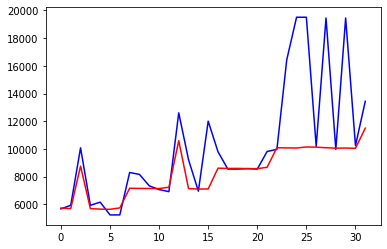

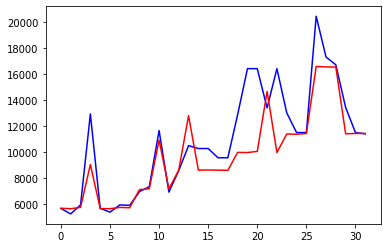

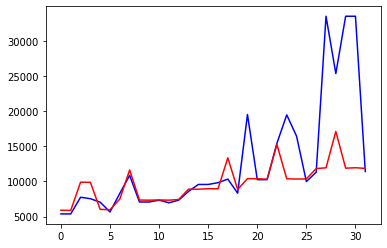

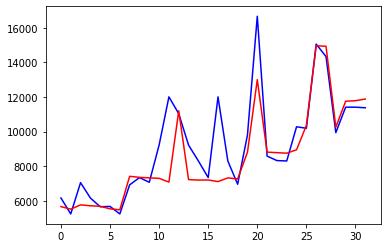

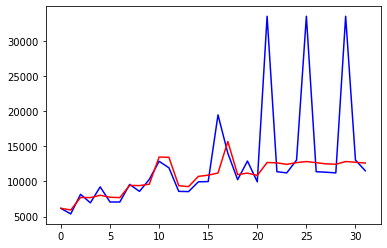

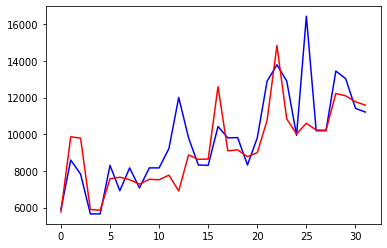

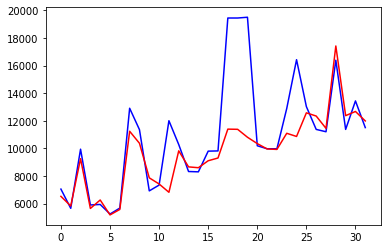

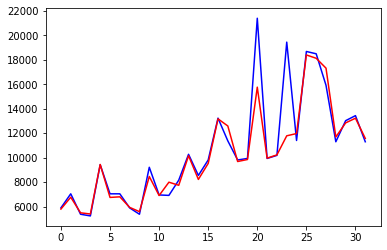

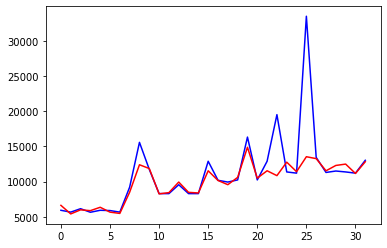

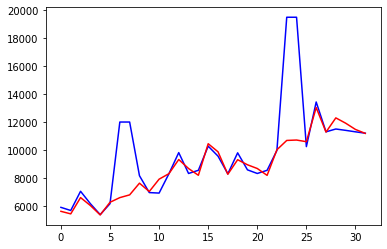

In [123]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=22, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 81,853
Trainable params: 81,853
Non-trainable params: 0
__________________________________________________

Epoch 28/100
 - 0s - loss: 1910.5650 - mae: 1910.5649
Epoch 29/100
 - 0s - loss: 1876.4304 - mae: 1876.4303
Epoch 30/100
 - 0s - loss: 1855.4168 - mae: 1855.4166
Epoch 31/100
 - 0s - loss: 1855.9090 - mae: 1855.9088
Epoch 32/100
 - 0s - loss: 1889.4743 - mae: 1889.4741
Epoch 33/100
 - 0s - loss: 1859.1632 - mae: 1859.1635
Epoch 34/100
 - 0s - loss: 1860.6101 - mae: 1860.6100
Epoch 35/100
 - 0s - loss: 1858.7409 - mae: 1858.7411
Epoch 36/100
 - 0s - loss: 1900.9970 - mae: 1900.9969
Epoch 37/100
 - 0s - loss: 1860.0063 - mae: 1860.0063
Epoch 38/100
 - 0s - loss: 1870.2185 - mae: 1870.2183
Epoch 39/100
 - 0s - loss: 1888.9733 - mae: 1888.9733
Epoch 40/100
 - 0s - loss: 1936.3828 - mae: 1936.3831
Epoch 41/100
 - 0s - loss: 1895.0998 - mae: 1895.1001
Epoch 42/100
 - 0s - loss: 1863.7418 - mae: 1863.7419
Epoch 43/100
 - 0s - loss: 1865.5457 - mae: 1865.5455
Epoch 44/100
 - 0s - loss: 1825.1744 - mae: 1825.1743
Epoch 45/100
 - 0s - loss: 1982.6095 - mae: 1982.6094
Epoch 46/100
 - 0s - loss: 1

Epoch 78/100
 - 0s - loss: 1609.0440 - mae: 1609.0439
Epoch 79/100
 - 0s - loss: 1606.5688 - mae: 1606.5688
Epoch 80/100
 - 0s - loss: 1677.0912 - mae: 1677.0913
Epoch 81/100
 - 0s - loss: 1595.8537 - mae: 1595.8536
Epoch 82/100
 - 0s - loss: 1579.1313 - mae: 1579.1313
Epoch 83/100
 - 0s - loss: 1588.7628 - mae: 1588.7627
Epoch 84/100
 - 0s - loss: 1583.2527 - mae: 1583.2527
Epoch 85/100
 - 0s - loss: 1584.4841 - mae: 1584.4840
Epoch 86/100
 - 0s - loss: 1654.1646 - mae: 1654.1647
Epoch 87/100
 - 0s - loss: 1605.7750 - mae: 1605.7749
Epoch 88/100
 - 0s - loss: 1566.0631 - mae: 1566.0630
Epoch 89/100
 - 0s - loss: 1586.0021 - mae: 1586.0022
Epoch 90/100
 - 0s - loss: 1580.9560 - mae: 1580.9559
Epoch 91/100
 - 0s - loss: 1588.0371 - mae: 1588.0372
Epoch 92/100
 - 0s - loss: 1595.3327 - mae: 1595.3326
Epoch 93/100
 - 0s - loss: 1619.5487 - mae: 1619.5487
Epoch 94/100
 - 0s - loss: 1586.4555 - mae: 1586.4556
Epoch 95/100
 - 0s - loss: 1593.9329 - mae: 1593.9329
Epoch 96/100
 - 0s - loss: 1

Epoch 27/100
 - 0s - loss: 1649.5232 - mae: 1649.5231
Epoch 28/100
 - 0s - loss: 1639.8797 - mae: 1639.8796
Epoch 29/100
 - 0s - loss: 1608.3996 - mae: 1608.3997
Epoch 30/100
 - 0s - loss: 1615.1012 - mae: 1615.1011
Epoch 31/100
 - 0s - loss: 1694.8757 - mae: 1694.8757
Epoch 32/100
 - 0s - loss: 1609.0037 - mae: 1609.0038
Epoch 33/100
 - 0s - loss: 1621.0412 - mae: 1621.0410
Epoch 34/100
 - 0s - loss: 1599.0994 - mae: 1599.0995
Epoch 35/100
 - 0s - loss: 1626.7746 - mae: 1626.7748
Epoch 36/100
 - 0s - loss: 1637.1994 - mae: 1637.1992
Epoch 37/100
 - 0s - loss: 1620.8247 - mae: 1620.8247
Epoch 38/100
 - 0s - loss: 1617.1304 - mae: 1617.1305
Epoch 39/100
 - 0s - loss: 1639.6898 - mae: 1639.6898
Epoch 40/100
 - 0s - loss: 1628.3689 - mae: 1628.3687
Epoch 41/100
 - 0s - loss: 1676.8719 - mae: 1676.8722
Epoch 42/100
 - 0s - loss: 1677.9135 - mae: 1677.9138
Epoch 43/100
 - 0s - loss: 1647.5089 - mae: 1647.5090
Epoch 44/100
 - 0s - loss: 1622.3631 - mae: 1622.3629
Epoch 45/100
 - 0s - loss: 1

Epoch 77/100
 - 0s - loss: 1671.2795 - mae: 1671.2794
Epoch 78/100
 - 0s - loss: 1672.1607 - mae: 1672.1608
Epoch 79/100
 - 0s - loss: 1666.7543 - mae: 1666.7544
Epoch 80/100
 - 0s - loss: 1700.0621 - mae: 1700.0623
Epoch 81/100
 - 0s - loss: 1717.0031 - mae: 1717.0031
Epoch 82/100
 - 0s - loss: 1808.6337 - mae: 1808.6339
Epoch 83/100
 - 0s - loss: 1772.0244 - mae: 1772.0244
Epoch 84/100
 - 0s - loss: 1753.0336 - mae: 1753.0337
Epoch 85/100
 - 0s - loss: 1718.0090 - mae: 1718.0092
Epoch 86/100
 - 0s - loss: 1662.5923 - mae: 1662.5923
Epoch 87/100
 - 0s - loss: 1668.8383 - mae: 1668.8384
Epoch 88/100
 - 0s - loss: 1733.7022 - mae: 1733.7023
Epoch 89/100
 - 0s - loss: 1725.7076 - mae: 1725.7076
Epoch 90/100
 - 0s - loss: 1682.1526 - mae: 1682.1528
Epoch 91/100
 - 0s - loss: 1683.4908 - mae: 1683.4907
Epoch 92/100
 - 0s - loss: 1665.3021 - mae: 1665.3022
Epoch 93/100
 - 0s - loss: 1679.6767 - mae: 1679.6768
Epoch 94/100
 - 0s - loss: 1664.5263 - mae: 1664.5265
Epoch 95/100
 - 0s - loss: 1

Epoch 26/100
 - 0s - loss: 1572.4991 - mae: 1572.4990
Epoch 27/100
 - 0s - loss: 1583.8291 - mae: 1583.8291
Epoch 28/100
 - 0s - loss: 1615.2643 - mae: 1615.2643
Epoch 29/100
 - 0s - loss: 1627.0270 - mae: 1627.0270
Epoch 30/100
 - 0s - loss: 1556.5196 - mae: 1556.5197
Epoch 31/100
 - 0s - loss: 1567.1336 - mae: 1567.1337
Epoch 32/100
 - 0s - loss: 1616.2319 - mae: 1616.2314
Epoch 33/100
 - 0s - loss: 1616.2064 - mae: 1616.2063
Epoch 34/100
 - 0s - loss: 1626.5569 - mae: 1626.5569
Epoch 35/100
 - 0s - loss: 1720.7507 - mae: 1720.7506
Epoch 36/100
 - 0s - loss: 1594.8403 - mae: 1594.8403
Epoch 37/100
 - 0s - loss: 1878.8410 - mae: 1878.8412
Epoch 38/100
 - 0s - loss: 1575.7377 - mae: 1575.7377
Epoch 39/100
 - 0s - loss: 1580.5433 - mae: 1580.5435
Epoch 40/100
 - 0s - loss: 1544.6983 - mae: 1544.6982
Epoch 41/100
 - 0s - loss: 1561.1352 - mae: 1561.1351
Epoch 42/100
 - 0s - loss: 1571.7256 - mae: 1571.7257
Epoch 43/100
 - 0s - loss: 1568.1697 - mae: 1568.1698
Epoch 44/100
 - 0s - loss: 1

Epoch 76/100
 - 0s - loss: 1496.0243 - mae: 1496.0240
Epoch 77/100
 - 0s - loss: 1480.6540 - mae: 1480.6541
Epoch 78/100
 - 0s - loss: 1486.0131 - mae: 1486.0131
Epoch 79/100
 - 0s - loss: 1504.4561 - mae: 1504.4562
Epoch 80/100
 - 0s - loss: 1512.6631 - mae: 1512.6631
Epoch 81/100
 - 0s - loss: 1476.6939 - mae: 1476.6937
Epoch 82/100
 - 0s - loss: 1479.0841 - mae: 1479.0839
Epoch 83/100
 - 0s - loss: 1456.7178 - mae: 1456.7178
Epoch 84/100
 - 0s - loss: 1479.6752 - mae: 1479.6753
Epoch 85/100
 - 0s - loss: 1518.3811 - mae: 1518.3811
Epoch 86/100
 - 0s - loss: 1732.4031 - mae: 1732.4031
Epoch 87/100
 - 0s - loss: 1533.5083 - mae: 1533.5083
Epoch 88/100
 - 0s - loss: 1548.8827 - mae: 1548.8828
Epoch 89/100
 - 0s - loss: 1600.1428 - mae: 1600.1428
Epoch 90/100
 - 0s - loss: 1472.3528 - mae: 1472.3529
Epoch 91/100
 - 0s - loss: 1487.7834 - mae: 1487.7837
Epoch 92/100
 - 0s - loss: 1646.5751 - mae: 1646.5752
Epoch 93/100
 - 0s - loss: 1724.8767 - mae: 1724.8768
Epoch 94/100
 - 0s - loss: 1

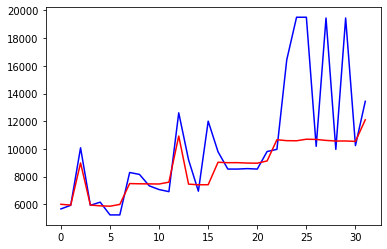

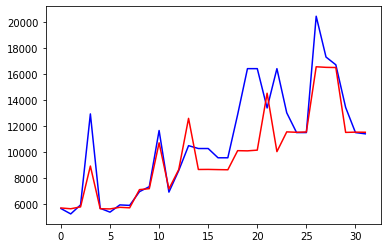

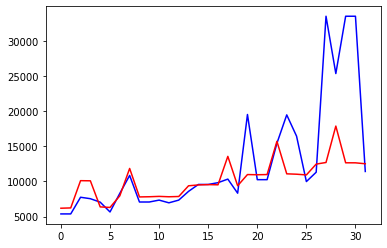

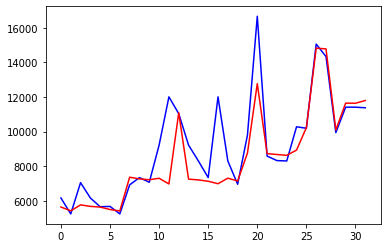

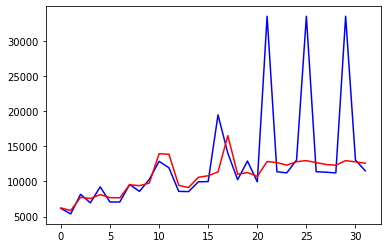

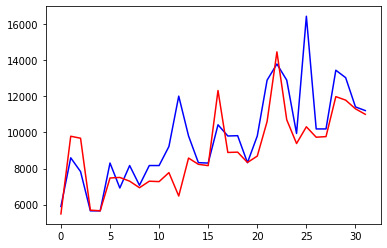

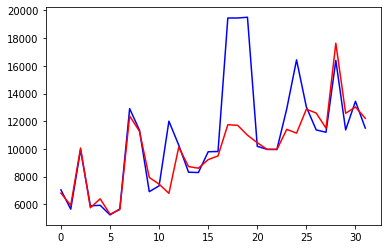

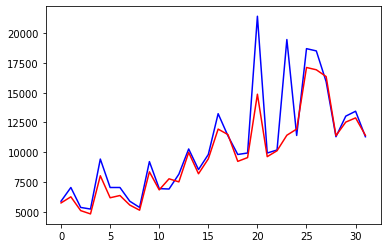

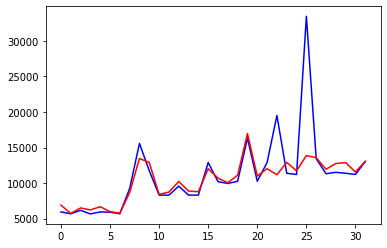

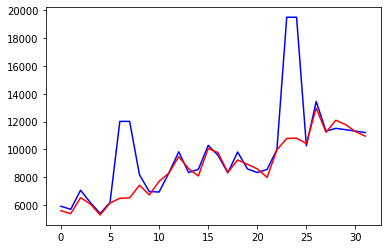

In [124]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 